In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

##### Reading Dataset

In [3]:
df = pd.read_csv('./Egypt_Houses_Price.csv', sep = ',')

#### Show head rows of data and info

In [4]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


#### Sum the outliner in data

In [6]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [7]:
df.dtypes

Type              object
Price             object
Bedrooms          object
Bathrooms         object
Area              object
Furnished         object
Level             object
Compound          object
Payment_Option    object
Delivery_Date     object
Delivery_Term     object
City              object
dtype: object

## Data preprocessing 

In [8]:
import missingno as msno

<AxesSubplot:>

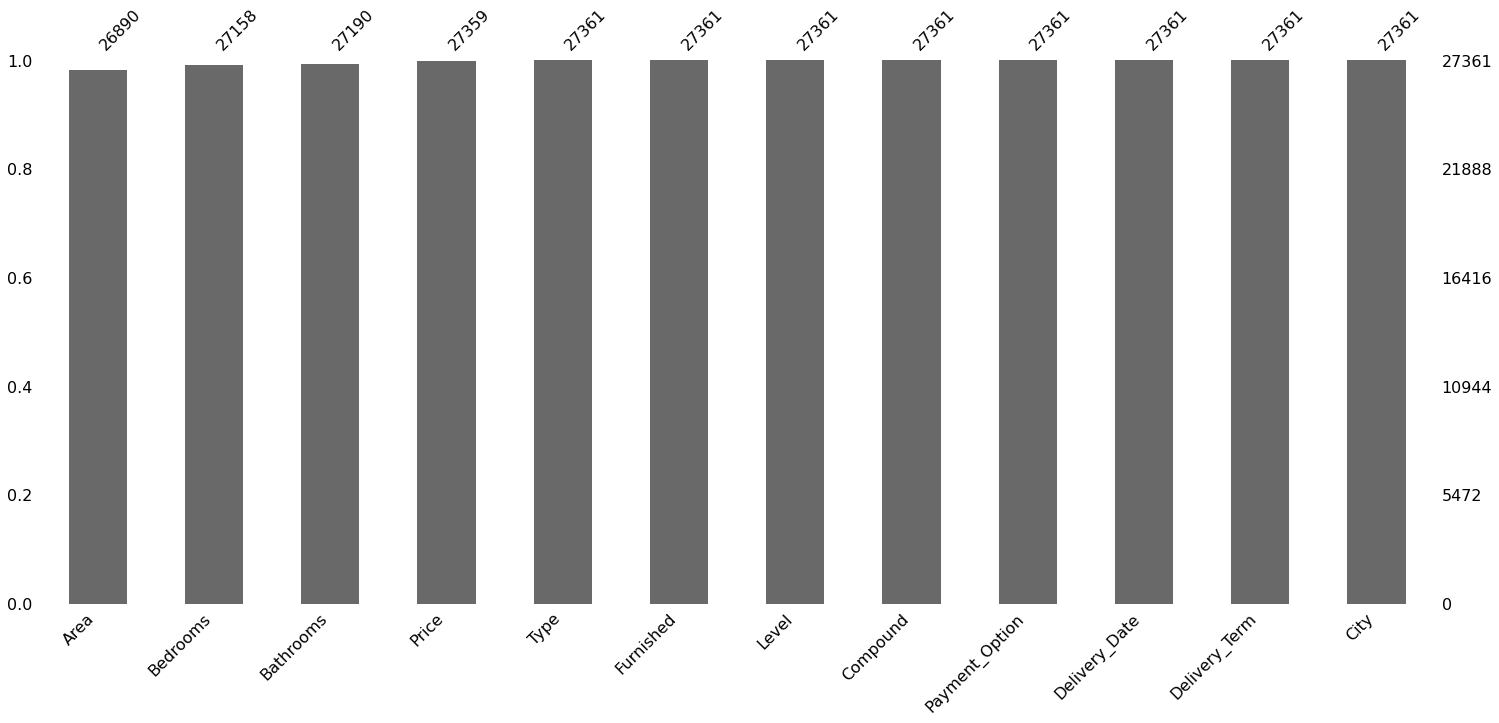

In [9]:
msno.bar(df, sort='ascending')

In [10]:
df = df[df['Bathrooms'] != 'Unknown']

In [11]:
df = df[df['Price'] != 'Unknown']

In [12]:
df['Area'].replace('Unknown', np.nan)
df['Bedrooms'].replace('Unknown', np.nan)
df['Bathrooms'].replace('Unknown', np.nan)

0        3.0
1        3.0
2        2.0
3        2.0
4        3.0
        ... 
27356    2.0
27357    3.0
27358    4.0
27359    4.0
27360    5.0
Name: Bathrooms, Length: 27324, dtype: object

In [13]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [14]:
df['Bedrooms'] = df['Bedrooms'].replace('10+', '11')
df['Bathrooms'] = df['Bathrooms'].replace('10+', '11')

In [15]:
df['Area'] = df['Area'].astype(float)
df['Price'] = df['Price'].astype(float)
df['Bedrooms'] = df['Bedrooms'].astype(float)
df['Bathrooms'] = df['Bathrooms'].astype(float)

In [16]:
df['Area']=df['Area'].fillna(df['Area'].mean())
df['Price']=df['Price'].fillna(df['Price'].mean())
df['Bedrooms']=df['Bedrooms'].fillna(df['Bedrooms'].mean())
df['Bathrooms']=df['Bathrooms'].fillna(df['Bathrooms'].mean())

In [17]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

In [18]:
furnished = len(df[df['Furnished'] == 'Unknown']) / len(df)
level = len(df[df['Level'] == 'Unknown']) / len(df)
compound = len(df[df['Compound'] == 'Unknown']) / len(df)
Payment_Option = len(df[df['Payment_Option'] == 'Unknown']) / len(df)
Delivery_Date = len(df[df['Delivery_Date'] == 'Unknown']) / len(df)
Delivery_Term = len(df[df['Delivery_Term'] == 'Unknown']) / len(df)
City = len(df[df['City'] == 'Unknown']) / len(df)

In [19]:
print('Furnished: ', furnished)
print('Level: ',level)
print('Compound: ',compound)
print('Payment_Option: ',Payment_Option)
print('Delivery_Date: ',Delivery_Date)
print('Delivery_Term: ',Delivery_Term)
print('City: ',City)

Furnished:  0.3107890499194847
Level:  0.3806909676474894
Compound:  0.4037476211389255
Payment_Option:  0.0
Delivery_Date:  0.36861367296149905
Delivery_Term:  0.0
City:  0.0


In [20]:
df = df.drop('Level', 1)
df = df.drop('Compound', 1)
df = df.drop('Delivery_Date', 1)

C:\Users\SHEBL\AppData\Local\Temp\ipykernel_13884\3853260778.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Level', 1)
C:\Users\SHEBL\AppData\Local\Temp\ipykernel_13884\3853260778.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Compound', 1)
C:\Users\SHEBL\AppData\Local\Temp\ipykernel_13884\3853260778.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Delivery_Date', 1)


## The Model

In [21]:
df = df[['Type', 'Bathrooms', 'Area', 'Furnished', 'Payment_Option', 'Delivery_Term', 'City', 'Price']]

In [22]:
X = df.iloc[:, 0:7].values

In [23]:
y = df.iloc[:, 7].values

#### Using LabelEncoder to transform categorical variables into continuous variables 

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label_encoder_Type = LabelEncoder()
label_encoder_Furnished = LabelEncoder()
label_encoder_Payment_Option = LabelEncoder()
label_encoder_Delivery_Term = LabelEncoder()
label_encoder_City = LabelEncoder()

In [26]:
X[:,0] = label_encoder_Type.fit_transform(X[:,0])
X[:,3] = label_encoder_Furnished.fit_transform(X[:,3])
X[:,4] = label_encoder_Payment_Option.fit_transform(X[:,4])
X[:,5] = label_encoder_Delivery_Term.fit_transform(X[:,5])
X[:,6] = label_encoder_City.fit_transform(X[:,6])

#### Applying StandardScaler in our data to put the data in the same size setting

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
y_standard = scaler.fit_transform(y.reshape(-1,1))

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_standard, test_size = 0.3, random_state = 0)

In [30]:
X_train.shape, y_train.shape

((19126, 7), (19126, 1))

In [31]:
X_test.shape, y_test.shape

((8198, 7), (8198, 1))

#### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [33]:
lr_model.fit(X_train, y_train)

LinearRegression()

#### Checking the intercept

In [34]:
lr_normal_intercept = lr_model.intercept_

In [35]:
lr_normal_intercept

array([-0.00475882])

In [36]:
lr_normal_coef = lr_model.coef_

In [37]:
lr_normal_coef

array([[ 0.027267  ,  0.34687679,  0.28743563,  0.05591601, -0.0541236 ,
        -0.08011838,  0.03575192]])

In [38]:
lr_normal_score_train = lr_model.score(X_train, y_train)

In [39]:
lr_normal_score_train

0.4034873150843856

In [40]:
lr_normal_score_test = lr_model.score(X_test, y_test)

In [41]:
lr_normal_score_test

0.3282858883706822

In [42]:
previsoes = lr_model.predict(X_test)

In [43]:
mse_lr_normal = mean_absolute_error(y_test, previsoes)

In [44]:
mse_lr_normal

0.40216272314600626

In [45]:
rmse_lr_normal = np.sqrt(mean_squared_error(y_test, previsoes))

In [46]:
rmse_lr_normal

0.8882163943235476

### Polynomial Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
poly = PolynomialFeatures(degree = 2)

In [49]:
X_poly_train = poly.fit_transform(X_train)

In [50]:
X_poly_test = poly.transform(X_test)

In [51]:
X_poly_train.shape, X_poly_test.shape

((19126, 36), (8198, 36))

In [52]:
lr_poly = LinearRegression()

In [53]:
lr_poly.fit(X_poly_train, y_train)

LinearRegression()

In [54]:
lr_poly_normal_score_train = lr_poly.score(X_poly_train, y_train)

In [55]:
lr_poly_normal_score_train

0.45934608615843897

In [56]:
lr_poly_normal_score_test = lr_poly.score(X_poly_test, y_test)

In [57]:
lr_poly_normal_score_test

0.3770984307992393

In [58]:
previsoes = lr_poly.predict(X_poly_test)

In [59]:
mse_poly_normal = mean_absolute_error(y_test, previsoes)

In [60]:
mse_poly_normal

0.3730161014156391

In [61]:
rmse_poly_normal = np.sqrt(mean_squared_error(y_test, previsoes))

In [62]:
rmse_poly_normal

0.8553350349185941

### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#### Applying GridSearch

##### Here we are applying GridSearch to check which are the best metrics to use.

In [64]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

In [65]:
model = DecisionTreeRegressor()

In [66]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [68]:
gridDecisionTree.fit(X_train, y_train)

C:\Users\SHEBL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SHEBL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SHEBL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\SHEBL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 178, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [67]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### Applying Decision Tree

In [68]:
decision_tree = DecisionTreeRegressor(min_samples_split = 6, max_depth = 7, criterion = 'absolute_error')

In [69]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_split=6)

In [70]:
DecisionTreeRegressor(criterion='absolute_error', max_depth=7, min_samples_split=6)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_split=6)

In [71]:
lr_normal_decision_tree = decision_tree.score(X_train, y_train)

In [72]:
lr_normal_decision_tree

0.5489201068743494

In [73]:
lr_normal_decision_tree_test = decision_tree.score(X_test, y_test)

In [74]:
lr_normal_decision_tree_test

0.4110565698076156

##### Checking for Models errors

In [75]:
previsoes = decision_tree.predict(X_test)

In [76]:
mse_lr_normal_decision_tree  = mean_absolute_error(y_test, previsoes)

In [77]:
mse_lr_normal_decision_tree

0.3360878631251045

In [78]:
rmse_lr_normal_decision_tree = np.sqrt(mean_squared_error(y_test, previsoes))

In [79]:
rmse_lr_normal_decision_tree

0.831693561755134

### Applay Random Forest 

In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100)

In [81]:
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor()

In [82]:
lr_normal_rf = regressor_rf.score(X_train, y_train)

In [83]:
lr_normal_rf

0.8993015741103402

In [84]:
lr_normal_rf_test = regressor_rf.score(X_test, y_test)

In [85]:
lr_normal_rf_test

0.4692319355740294

In [86]:
import joblib

In [87]:
joblib.dump(regressor_rf, './../server/random_forest_model.pkl')

['./../server/random_forest_model.pkl']

##### Check model errors

In [98]:
previsoes = regressor_rf.predict(X_test)

In [99]:
mse_lr_normal_rf  = mean_absolute_error(y_test, previsoes)

In [100]:
mse_lr_normal_rf

0.2978338543577227

In [101]:
rmse_lr_normal_rf = np.sqrt(mean_squared_error(y_test, previsoes))

In [102]:
rmse_lr_normal_rf

0.7944800263451025

### Applay SVR (Support Vector Regression) Model

In [103]:
from sklearn.svm import SVR

In [104]:
regressor_svr_linear = SVR(kernel = 'linear')

In [105]:
regressor_svr_linear.fit(X_train, y_train.ravel())

SVR(kernel='linear')

In [106]:
standard_svm_linear = regressor_svr_linear.score(X_train, y_train)

In [107]:
standard_svm_linear

0.3537653438084627

In [108]:
standard_svm_linear_test = regressor_svr_linear.score(X_test, y_test)

In [109]:
standard_svm_linear_test

0.2776670441690402

In [110]:
previsoes = regressor_svr_linear.predict(X_test)

In [111]:
y_test_inverse = scaler.inverse_transform(y_test)
previsoes_inverse = scaler.inverse_transform(previsoes.reshape(-1,1))

In [112]:
mse_svr_linear_standard  = mean_absolute_error(y_test_inverse, previsoes_inverse)

In [113]:
mse_svr_linear_standard

2522361.789972317

In [114]:
rmse_svm_linear_standard = np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))

In [115]:
rmse_svm_linear_standard

6232256.464464474

In [116]:
regressor_svr_poly = SVR(kernel = 'poly', degree = 3)

In [117]:
regressor_svr_poly.fit(X_train, y_train.ravel())

SVR(kernel='poly')

In [118]:
standard_svm_poly = regressor_svr_poly.score(X_train, y_train)

In [119]:
standard_svm_poly

0.3721725128918453

In [120]:
standard_svm_poly_test = regressor_svr_poly.score(X_test, y_test)

In [121]:
standard_svm_poly_test

0.27308087732696207